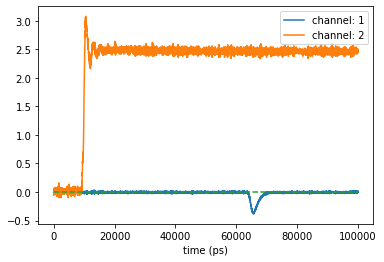

In [1]:
from mtdScope import scopeEmulator
import matplotlib.pyplot as plt
import numpy as np
import time
import mtdProcess as mp
        
#load the sample data to test
se = scopeEmulator()
se.loadData('data/FKBSensor_LaserTest/Batch2_6-3/HV200LP_DG.hdf5')
#se.loadData('./HV160_lowPower_100mV_11340R.hd5')
se.sliceEvent()
se.showEvent(2083,[1,2])

[   0    1    2 ... 4895 4897 4898]


3233

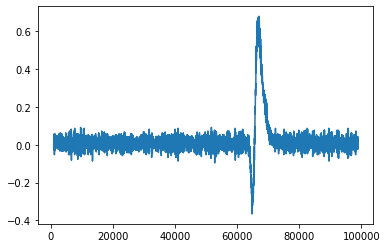

In [2]:
points = se.getEventYNormalized(29)
ntrun =int(np.floor(1000/se.dt))

f = se.simulateCFT(points[0], points[1])
yy = f(points[0][ntrun:-ntrun])

plt.plot(points[0][ntrun:-ntrun],yy)
s = np.where(np.diff(np.sign(yy)))
jmin = yy.argmin()
jmax = yy.argmax()
x = np.where(np.diff(np.sign(yy)))[0]
print(x)
arr1 = np.where(x < jmax)
arr1 = arr1[0][-1]
x[arr1]

In [3]:
ts, dts = mp.getCFT('data/FKBSensor_LaserTest/Batch2_6-3/HV200LP_DG.hdf5',2,[1],1000)


processing the 0th events...
processing the 1000th events...
processing the 2000th events...
collapsed at event: 2084 skipped
time consumed: 5.6146063804626465


54844.332 848
54669.098 907
24.20263
{'1': 24.20263}


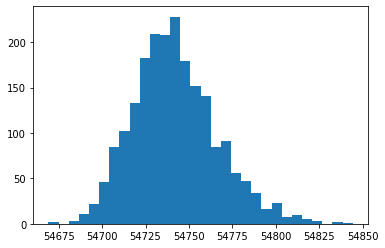

In [4]:
print(np.amax(ts[0]),np.argmax(ts[0]))
print(np.amin(ts[0]),np.argmin(ts[0]))
plt.hist(ts,bins =30)
print(ts[0].std())
print(dts)

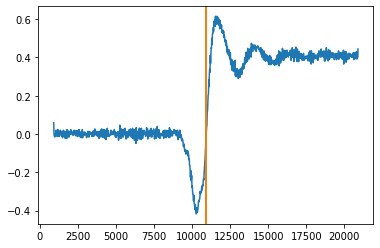

In [5]:
se.debug_cft( 848, 2, 'linear', 500)

In [6]:
np.trim_zeros(ts)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()